In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs

In [38]:
X,y=make_blobs(
    n_samples=1000,
    centers=3,
    n_features=2,
    random_state=47,
)

In [39]:
X

array([[ 3.10633394,  5.77713889],
       [-8.53767245,  8.4840399 ],
       [ 4.18234639, -4.05640675],
       ...,
       [-6.91949138,  8.95244272],
       [-8.74301731, 10.31328521],
       [-7.57236942,  8.56926433]])

In [40]:
y

array([2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0,
       2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0,
       1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0,
       1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2,
       0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2,
       1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1,

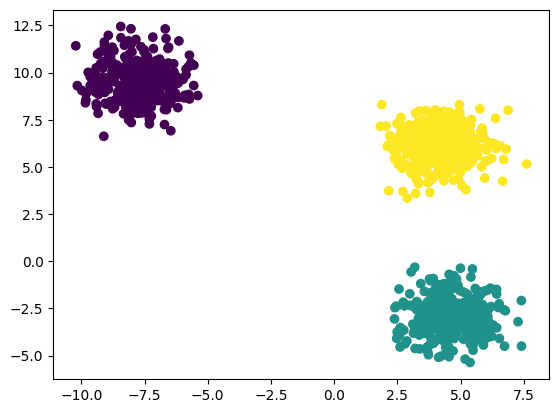

In [41]:
plt.scatter(X[:,0],X[:,1],c=y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=4)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
from sklearn.cluster import KMeans

In [46]:
# applying elbow method to select the k value
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)

In [47]:
wcss

[1339.9999999999998,
 362.8091380053293,
 41.62386466731592,
 37.11608002872892,
 31.653160653330627,
 29.23711154332597,
 24.33409255022705,
 22.905259966674087,
 18.22589246146376,
 16.647066823017227]

<function matplotlib.pyplot.show(close=None, block=None)>

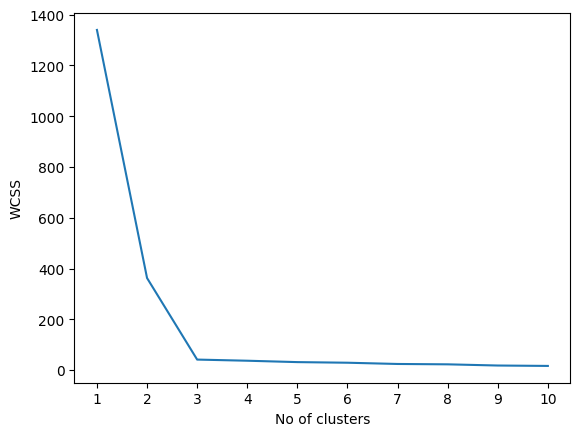

In [48]:
#plotting the elv\bow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show

In [49]:
kmeans=KMeans(n_clusters=3, init="k-means++")
kmeans.fit_predict(X_train_scaled)

array([2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0,
       0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0,
       2, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0,
       2, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0,
       1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2,
       2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2,
       1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 2,

In [50]:
y_pred=kmeans.predict(X_test_scaled)

In [51]:
y_pred

array([2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1,
       0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2,
       0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1,
       0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2,
       2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2,
       2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2,
       2, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0,
       2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1,

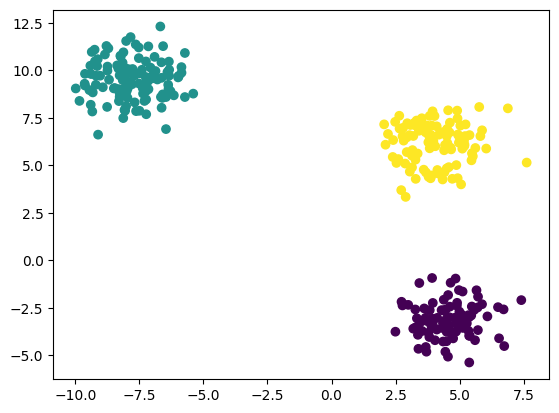

In [52]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred)


In [53]:
''' validating the k value
  1. kneelocator
  2. silhoutee scoring
'''

' validating the k value\n  1. kneelocator\n  2. silhoutee scoring\n'

In [54]:
## knee locator
!pip install kneed

In [56]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
print(kl.elbow)

3


In [58]:
#shiloutte scoring
from sklearn.metrics import silhouette_score


In [59]:
silhouette_coeffs=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled, kmeans.labels_)
  silhouette_coeffs.append(score)

In [60]:
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

<function matplotlib.pyplot.show(close=None, block=None)>

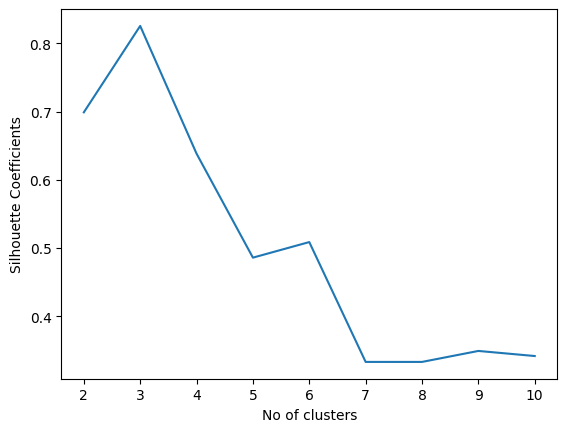

In [63]:
#plotting the elbow curve
plt.plot(range(2,11),silhouette_coeffs)
plt.xticks(range(2,11))
plt.xlabel("No of clusters")
plt.ylabel("Silhouette Coefficients")
plt.show